In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains attrition of Human Resources in a company along with many other features regarding the employees and some of these features are related with attrition

In [118]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [119]:
df.shape

(1470, 35)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Let's look at the entries in the categorical features

No     1233
Yes     237
Name: Attrition, dtype: int64

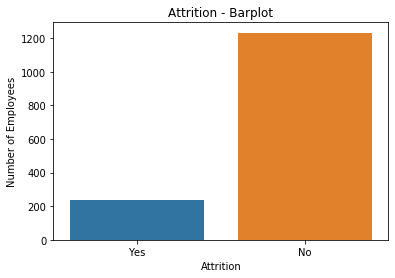

In [219]:
sns.countplot(df["Attrition"])
plt.ylabel('Number of Employees')
plt.title('Attrition - Barplot')
df['Attrition'].value_counts()

The above plot shows that almost 1/6 employees belong to attrition category in the dataset

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

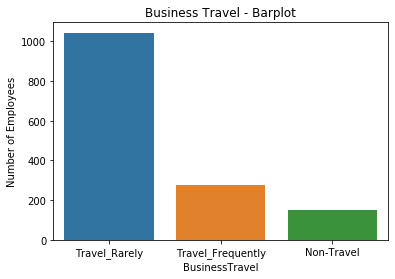

In [218]:
sns.countplot(df["BusinessTravel"])
plt.ylabel('Number of Employees')
plt.title('Business Travel - Barplot')
df['BusinessTravel'].value_counts()

The above plot shows that most of the employees rarely travel for business

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

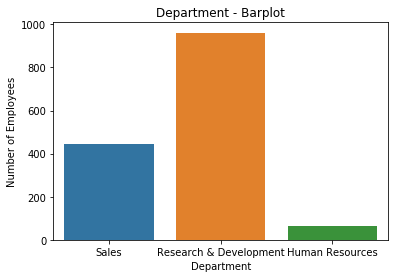

In [217]:
sns.countplot(df["Department"])
plt.ylabel('Number of Employees')
plt.title('Department - Barplot')
df['Department'].value_counts()

Research & Development dept. have the highest number of employees

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

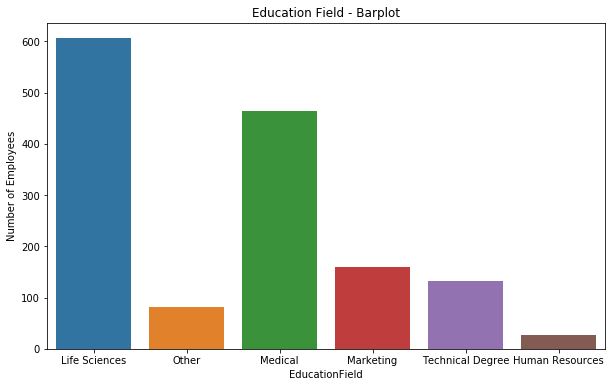

In [216]:
plt.figure(figsize=(10,6))
sns.countplot(df["EducationField"])
plt.ylabel('Number of Employees')
plt.title('Education Field - Barplot')
df['EducationField'].value_counts()

Most of the employees in the company are educated in Life Sciences and Medical Field

Male      882
Female    588
Name: Gender, dtype: int64

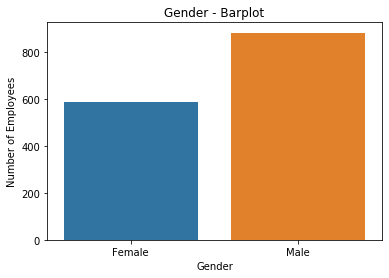

In [215]:
sns.countplot(df["Gender"])
plt.ylabel('Number of Employees')
plt.title('Gender - Barplot')
df['Gender'].value_counts()

Majority of the employees are male

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

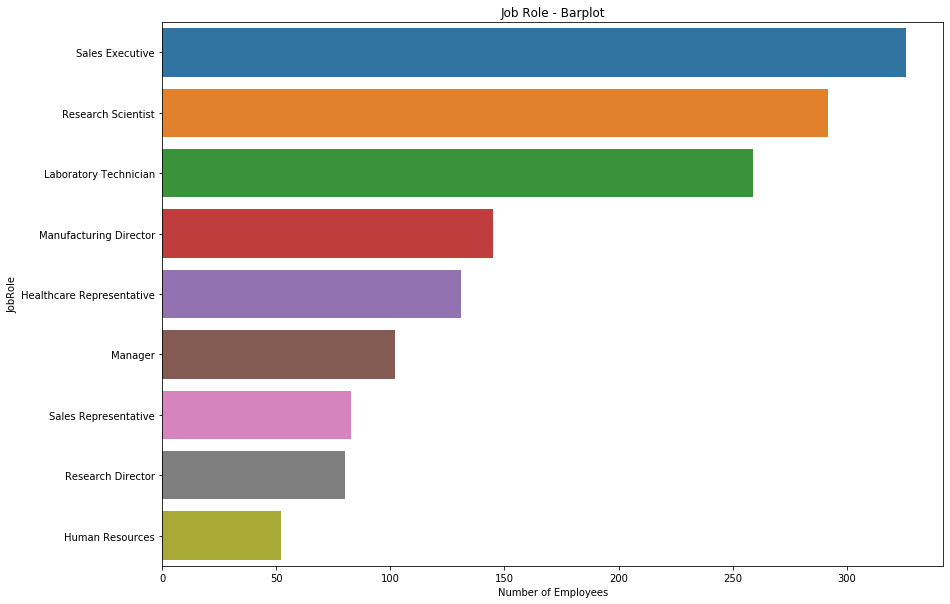

In [214]:
plt.figure(figsize=(14,10))
sns.countplot(y=df["JobRole"])
plt.xlabel('Number of Employees')
plt.title('Job Role - Barplot')
df['JobRole'].value_counts()

The above plot shows the distribution of job roles in the company

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

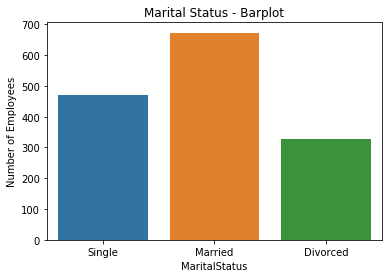

In [213]:
sns.countplot(df["MaritalStatus"])
plt.ylabel('Number of Employees')
plt.title('Marital Status - Barplot')
df['MaritalStatus'].value_counts()

Majority of the employees are married

In [132]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

This feature has no useful information, so let's drop it

In [133]:
df.drop("Over18", axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


No     1054
Yes     416
Name: OverTime, dtype: int64

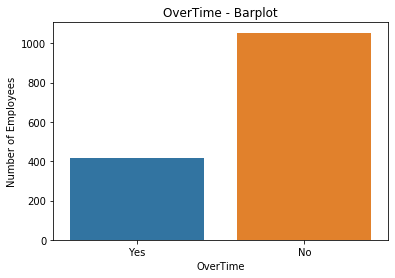

In [212]:
sns.countplot(df["OverTime"])
plt.ylabel('Number of Employees')
plt.title('OverTime - Barplot')
df['OverTime'].value_counts()

Almost 30% of the workforce works overtime

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Let's look into descriptive statistics of numerical features

In [136]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Average age of emplyees is almost 37 years

In [137]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Text(0.5, 1.0, 'Attrition as per Department - Barplot')

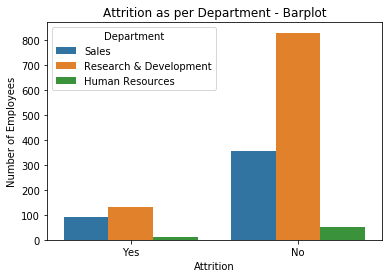

In [211]:
sns.countplot(x="Attrition",hue="Department", data = df)
plt.ylabel('Number of Employees')
plt.title('Attrition as per Department - Barplot')

Employees of the sales dept. are more likely to cause attrition when compared to R&D dept.

Text(0.5, 1.0, 'Attrition as per Job Role - Barplot')

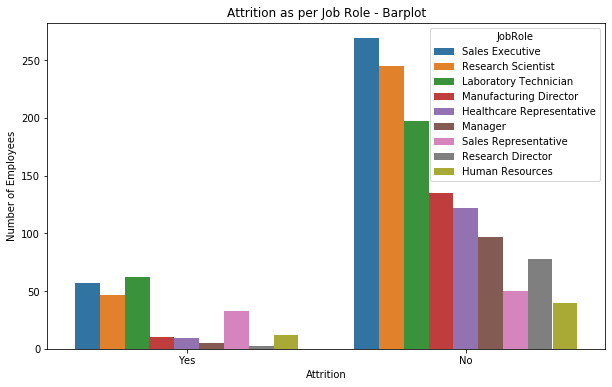

In [210]:
plt.figure(figsize=(10,6))
sns.countplot(x="Attrition",hue="JobRole", data = df)
plt.ylabel('Number of Employees')
plt.title('Attrition as per Job Role - Barplot')

From the above plot, Laboratory Technicians are more likely to cause attrition when compared to sales executive or research scientist. Sales Reprentatives also have a high attrition rate.

Text(0.5, 1.0, 'Attrition as per Marital Status - Barplot')

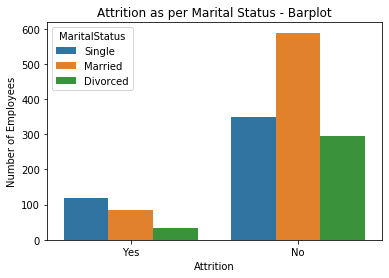

In [209]:
sns.countplot(x="Attrition",hue="MaritalStatus", data = df)
plt.ylabel('Number of Employees')
plt.title('Attrition as per Marital Status - Barplot')

From the above plot, single people are more likely to cause attrition when compared to married or divorced people

Text(0.5, 1.0, 'Attrition as per OverTime - Barplot')

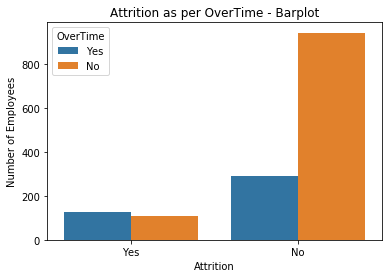

In [208]:
sns.countplot(x="Attrition",hue="OverTime", data = df)
plt.ylabel('Number of Employees')
plt.title('Attrition as per OverTime - Barplot')

People working overtime are more likely to cause attrition

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Text(0.5, 1.0, 'Employee Age - Histogram')

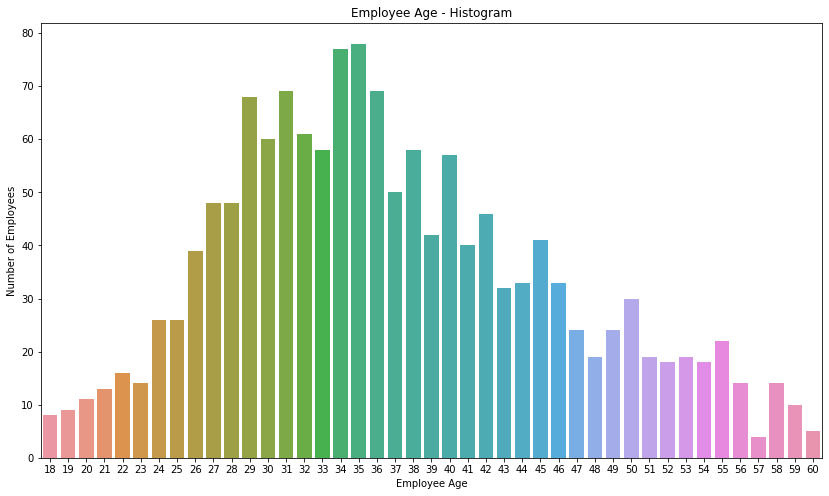

In [207]:
plt.figure(figsize=(14,8))
sns.countplot(df["Age"])
plt.xlabel('Employee Age')
plt.ylabel('Number of Employees')
plt.title('Employee Age - Histogram')

Age column approximates a normal distribution

Text(0.5, 1.0, 'Distance from home of Employees - Barplot')

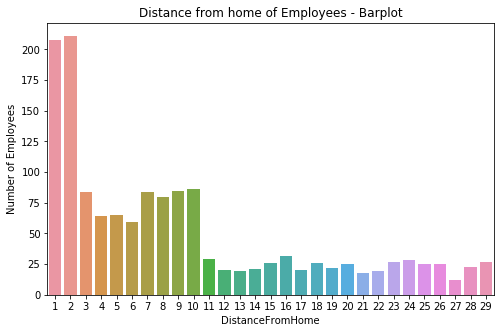

In [206]:
plt.figure(figsize=(8,5))
sns.countplot(df["DistanceFromHome"])
plt.ylabel('Number of Employees')
plt.title('Distance from home of Employees - Barplot')

Most of the employees live closer to the office

Text(0.5, 1.0, 'Education Level of Employees - Barplot')

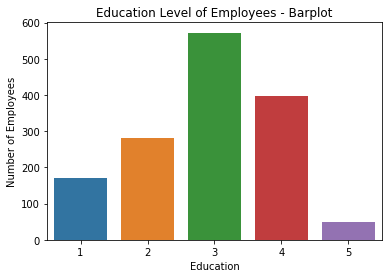

In [205]:
sns.countplot(df["Education"])
plt.ylabel('Number of Employees')
plt.title('Education Level of Employees - Barplot')

Most of the employee have mid level education, also very few people have the highest qualification (5)

In [149]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

EmployeeCount column has no useful information so let's drop it

In [150]:
df.shape

(1470, 34)

In [151]:
df.drop("EmployeeCount", axis=1,inplace=True)
df.shape

(1470, 33)

In [152]:
df['EmployeeNumber'].value_counts()

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64

EmployeeNumber is a unique number assigned to each employee and it has no relation with attrition so let's drop it

In [153]:
df.shape

(1470, 33)

In [154]:
df.drop("EmployeeNumber", axis=1,inplace=True)
df.shape

(1470, 32)

Text(0.5, 1.0, 'Environment Satisfaction of Employees - Barplot')

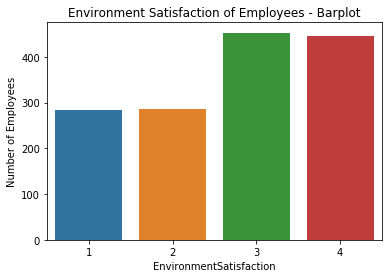

In [204]:
sns.countplot(df["EnvironmentSatisfaction"])
plt.ylabel('Number of Employees')
plt.title('Environment Satisfaction of Employees - Barplot')

Majority of the employees are relatively satisfied with their environment

Text(0.5, 1.0, 'Job Involvement of Employees - Barplot')

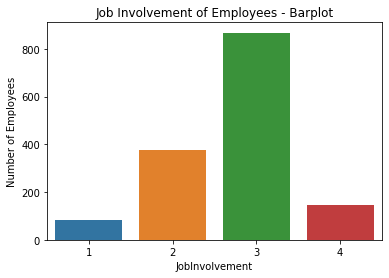

In [203]:
sns.countplot(df["JobInvolvement"])
plt.ylabel('Number of Employees')
plt.title('Job Involvement of Employees - Barplot')

Majority of the employees are relatively involved in their job

Text(0.5, 1.0, 'Job Level of Employees - Barplot')

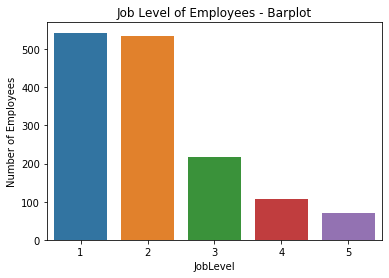

In [202]:
sns.countplot(df["JobLevel"])
plt.ylabel('Number of Employees')
plt.title('Job Level of Employees - Barplot')

Majority of the employees are towards lower job level

Text(0.5, 1.0, 'Job Satisfaction level of Employees - Barplot')

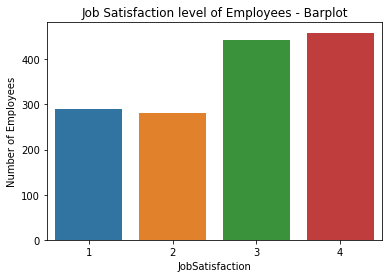

In [201]:
sns.countplot(df["JobSatisfaction"])
plt.ylabel('Number of Employees')
plt.title('Job Satisfaction level of Employees - Barplot')

Majority of the employees are relatively satisfied

Text(0.5, 1.0, 'Monthly Income Histogram')

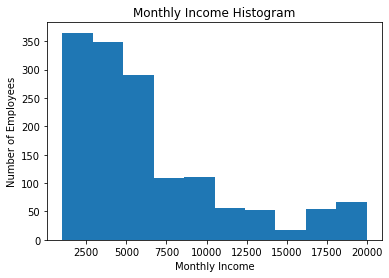

In [159]:
plt.hist(df["MonthlyIncome"])
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.title('Monthly Income Histogram')

Majority of the people have monthly incomes towards the minimum wage or very few people have relatively high incomes

Text(0.5, 1.0, 'Number of Companies Worked - Histogram')

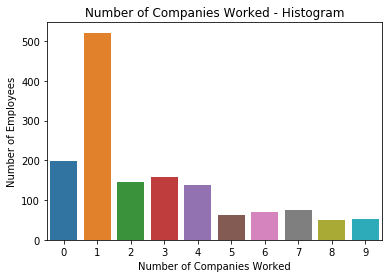

In [161]:
sns.countplot(df["NumCompaniesWorked"])
plt.xlabel('Number of Companies Worked')
plt.ylabel('Number of Employees')
plt.title('Number of Companies Worked - Histogram')

Most of the employees are currently their second job

Text(0.5, 1.0, 'Percent Salary Hike - Histogram')

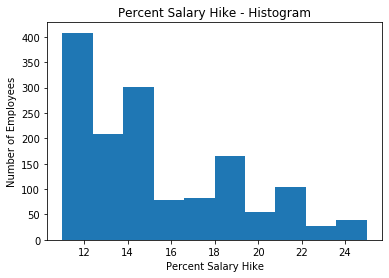

In [162]:
plt.hist(df["PercentSalaryHike"])
plt.xlabel('Percent Salary Hike')
plt.ylabel('Number of Employees')
plt.title('Percent Salary Hike - Histogram')

Majority of the people have salary hike towards the minimum or very few people have high incomes

Text(0.5, 1.0, 'Performance Rating - Barplot')

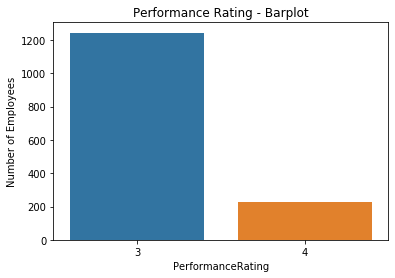

In [163]:
sns.countplot(df["PerformanceRating"])
plt.ylabel('Number of Employees')
plt.title('Performance Rating - Barplot')

Majority of the people have lesser performance rating

Text(0.5, 1.0, 'Relationship Satisfaction Level - Barplot')

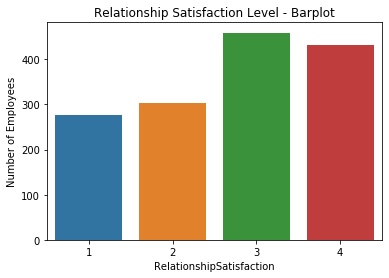

In [164]:
sns.countplot(df["RelationshipSatisfaction"])
plt.ylabel('Number of Employees')
plt.title('Relationship Satisfaction Level - Barplot')

Majority of the people are relatively satisfied with their relationships in the organisation

In [165]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

This column does not contain any distinguishing features, so let'd drop it

In [166]:
df.shape

(1470, 32)

In [167]:
df.drop("StandardHours", axis=1,inplace=True)
df.shape

(1470, 31)

Text(0.5, 1.0, 'Stock Option Level - Barplot')

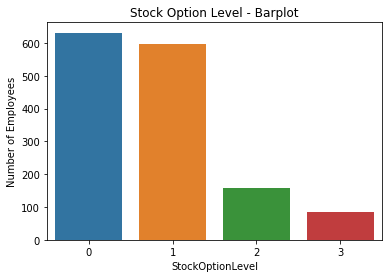

In [168]:
sns.countplot(df["StockOptionLevel"])
plt.ylabel('Number of Employees')
plt.title('Stock Option Level - Barplot')

Very few people have higher Stock Option Level

Text(0.5, 1.0, 'Total Working Years - Barplot')

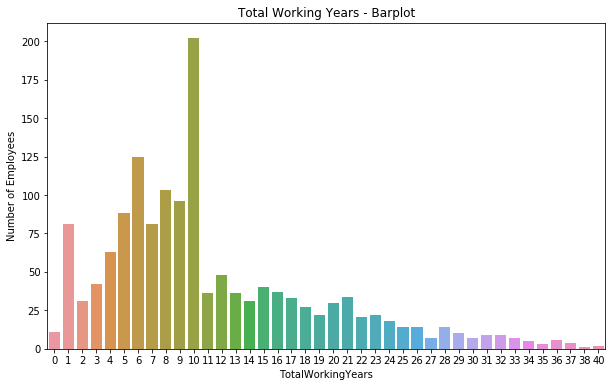

In [169]:
plt.figure(figsize=(10,6))
sns.countplot(df["TotalWorkingYears"])
plt.ylabel('Number of Employees')
plt.title('Total Working Years - Barplot')

very few employees have high work experience

Text(0.5, 1.0, 'Number of Trainings Attended - Barplot')

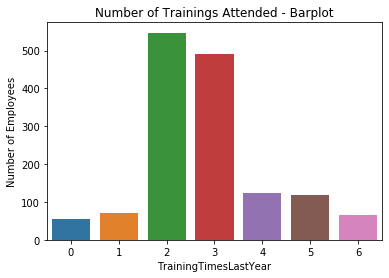

In [170]:
sns.countplot(df["TrainingTimesLastYear"])
plt.ylabel('Number of Employees')
plt.title('Number of Trainings Attended - Barplot')

Most of the employees attended 2-3 trainings last year

Text(0.5, 1.0, 'Work Life Balance level - Barplot')

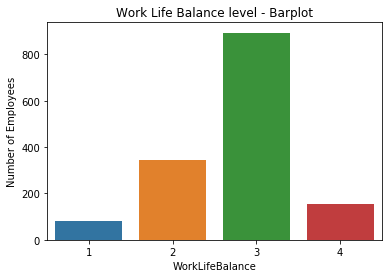

In [173]:
sns.countplot(df["WorkLifeBalance"])
plt.ylabel('Number of Employees')
plt.title('Work Life Balance level - Barplot')

Most of the employees have relatively higher work life balance 

Text(0.5, 1.0, 'Years At Company - Barplot')

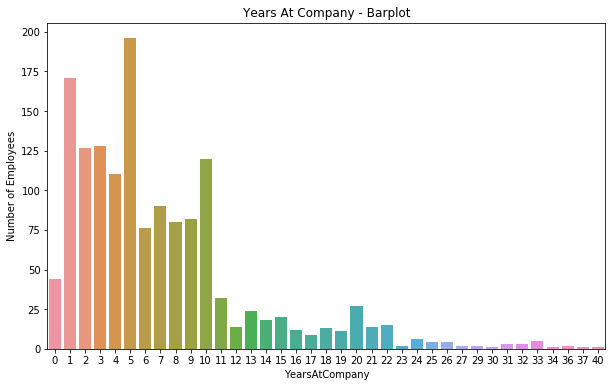

In [174]:
plt.figure(figsize=(10,6))
sns.countplot(df["YearsAtCompany"])
plt.ylabel('Number of Employees')
plt.title('Years At Company - Barplot')

Most of the employees are relatively new in the organisation

Text(0.5, 1.0, 'Years In Current Role - Barplot')

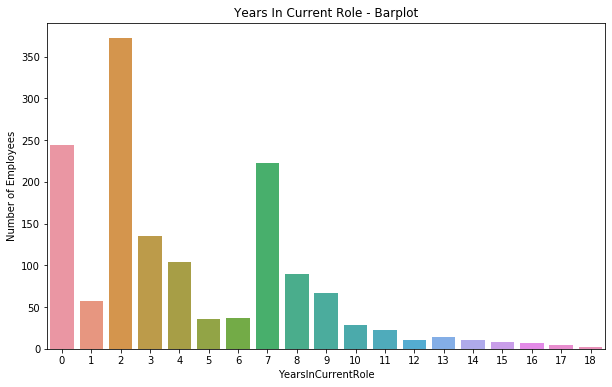

In [175]:
plt.figure(figsize=(10,6))
sns.countplot(df["YearsInCurrentRole"])
plt.ylabel('Number of Employees')
plt.title('Years In Current Role - Barplot')

Very few people are at a current role for more than 10 years

Text(0.5, 1.0, 'Years Since Last Promotion - Barplot')

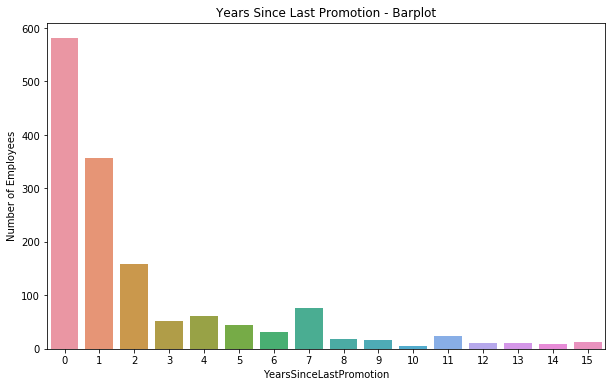

In [176]:
plt.figure(figsize=(10,6))
sns.countplot(df["YearsSinceLastPromotion"])
plt.ylabel('Number of Employees')
plt.title('Years Since Last Promotion - Barplot')

Very few employees have not gotten promotion since 8 years or more

Text(0.5, 1.0, 'Years With Current Manager - Barplot')

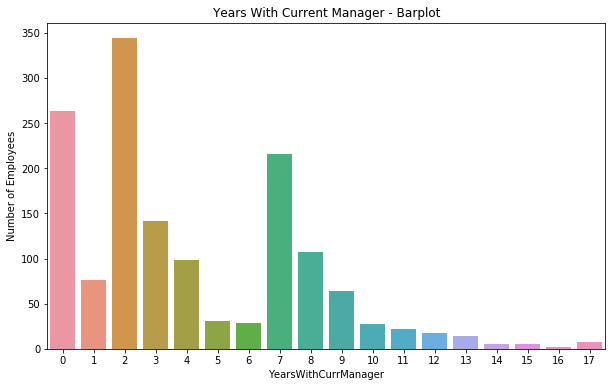

In [177]:
plt.figure(figsize=(10,6))
sns.countplot(df["YearsWithCurrManager"])
plt.ylabel('Number of Employees')
plt.title('Years With Current Manager - Barplot')

Very few employees have worked for more than 10 years with a manager

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Text(0.5, 1.0, 'Attrition vs Age Swarmplot')

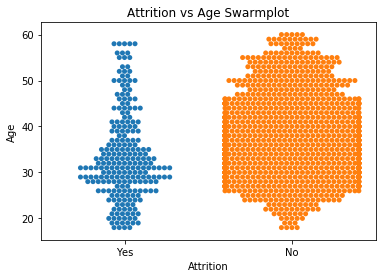

In [179]:
sns.swarmplot(x="Attrition", y="Age", data=df)
plt.title('Attrition vs Age Swarmplot')

Attrition is relatively higher for younger employees

Text(0.5, 1.0, 'Attrition vs Monthly Income Swarmplot')

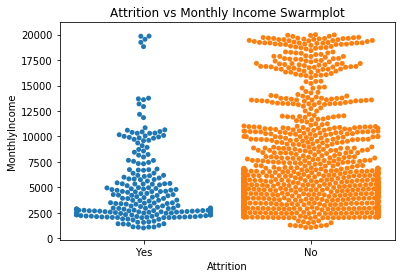

In [180]:
sns.swarmplot(x="Attrition", y="MonthlyIncome",data=df)
plt.title('Attrition vs Monthly Income Swarmplot')

Highest attrition is observed for employees with lesser monthly income

Text(0.5, 1.0, 'Attrition vs Distance From Home Swarmplot')

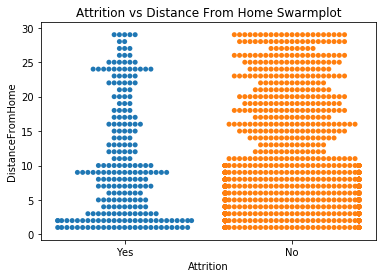

In [182]:
sns.swarmplot(x="Attrition", y="DistanceFromHome",data=df)
plt.title('Attrition vs Distance From Home Swarmplot')

From the above plot, attrition is relatively higher for employees who live closer to office, which is surprising as we expect people who live far to cause more attrition

Text(0.5, 1.0, 'Attrition vs Percent Salary Hike Swarmplot')

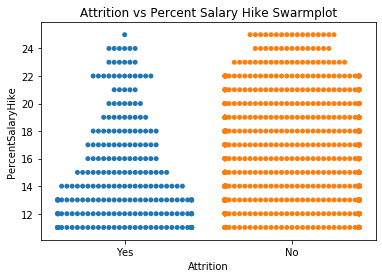

In [183]:
sns.swarmplot(x="Attrition", y="PercentSalaryHike",data=df)
plt.title('Attrition vs Percent Salary Hike Swarmplot')

From the above plot, people who got lesser hikes caused more attrition

Text(0.5, 1.0, 'Attrition vs Total Working Years Swarmplot')

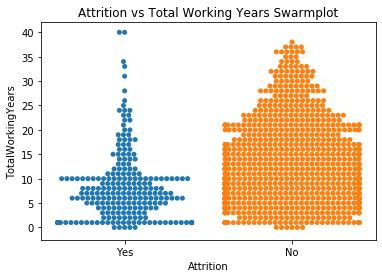

In [184]:
sns.swarmplot(x="Attrition", y="TotalWorkingYears",data=df)
plt.title('Attrition vs Total Working Years Swarmplot')

From the above plot, employees who have relatively lesser work experience caused the most attrition

Text(0.5, 1.0, 'Attrition vs Years At Company Swarmplot')

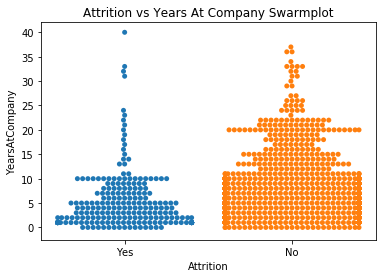

In [185]:
sns.swarmplot(x="Attrition", y="YearsAtCompany",data=df)
plt.title('Attrition vs Years At Company Swarmplot')

From the above plot, relatively new employees caused the most attrition

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Let's look at the correlation of the different features

In [66]:
cor = df.corr()
cor

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


Correlation matrix heatmap

Text(0.5, 1, 'Correlaton Visualization')

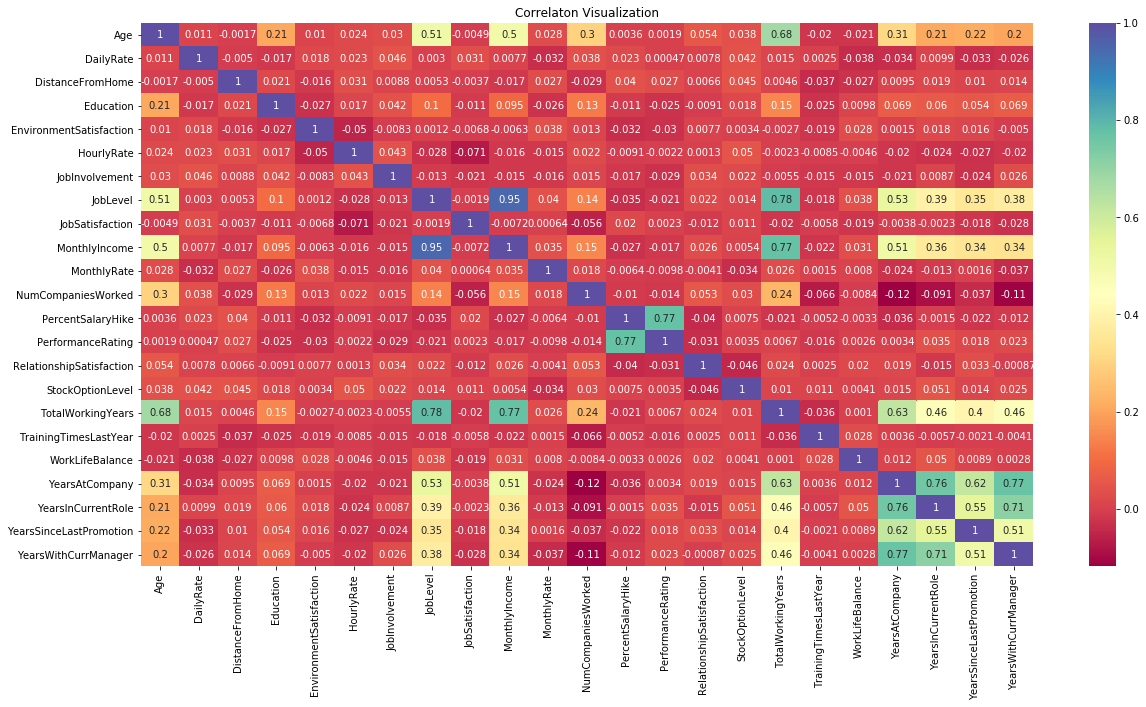

In [186]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,cmap='Spectral',annot=True)
plt.title('Correlaton Visualization')

In [187]:
age = df.groupby(['Age'],sort = True).mean()
age

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
18,747.625000,6.125000,2.500000,2.750000,68.125000,2.875000,1.000000,3.250000,1518.375000,14476.000000,...,3.000000,3.125000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000
19,548.444444,10.555556,2.111111,2.444444,63.555556,2.444444,1.000000,2.555556,2075.000000,15119.666667,...,3.444444,2.888889,0.000000,0.888889,3.000000,3.222222,0.777778,0.222222,0.111111,0.111111
20,819.454545,7.090909,2.636364,3.181818,61.909091,2.636364,1.000000,2.636364,2539.363636,16480.909091,...,3.000000,2.363636,0.000000,1.545455,2.727273,2.909091,1.545455,1.000000,0.636364,1.181818
21,762.846154,9.076923,1.615385,2.692308,67.307692,2.692308,1.000000,2.692308,2491.461538,17268.923077,...,3.153846,2.692308,0.000000,1.923077,3.538462,2.769231,1.846154,1.230769,1.076923,1.076923
22,806.937500,8.437500,1.812500,2.812500,69.812500,2.750000,1.125000,2.937500,2950.000000,14424.125000,...,3.250000,2.250000,0.750000,2.687500,3.062500,2.750000,2.062500,1.312500,0.937500,1.312500
23,707.928571,9.142857,1.857143,2.857143,66.071429,3.214286,1.071429,2.428571,2515.357143,15377.928571,...,3.214286,2.714286,0.785714,3.357143,2.642857,2.928571,2.642857,1.714286,0.500000,1.642857
24,863.115385,11.884615,2.115385,2.500000,62.615385,2.807692,1.269231,2.769231,3243.923077,12767.730769,...,3.115385,2.769231,1.115385,4.153846,2.692308,2.769231,3.346154,1.884615,0.884615,1.692308
25,768.076923,8.769231,1.923077,2.538462,65.961538,2.846154,1.500000,2.692308,4144.769231,15508.692308,...,3.115385,2.846154,0.769231,5.269231,3.038462,2.769231,3.846154,2.692308,0.884615,2.615385
26,844.769231,10.230769,2.641026,2.384615,62.384615,2.564103,1.307692,2.769231,3531.487179,13793.538462,...,3.256410,2.538462,0.717949,5.615385,2.897436,2.666667,4.692308,3.666667,1.641026,3.000000


Text(0.5, 1.0, 'Average Monthly Income vs Employee Age')

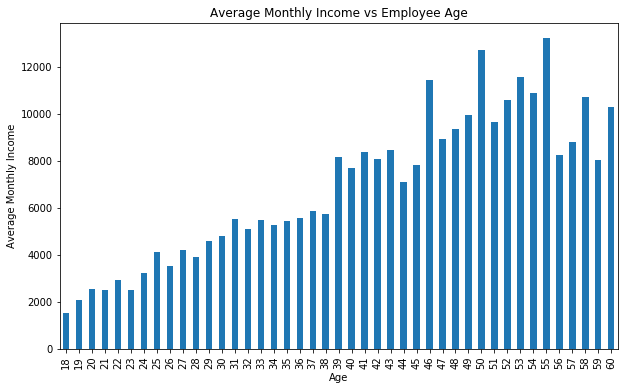

In [189]:
plt.figure(figsize=(10,6))
age["MonthlyIncome"].plot.bar()
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income vs Employee Age')

Average salary generally increases with age

In [190]:
Job_Role = df.groupby(['JobRole'],sort = True).mean()

Text(0.5, 1.0, 'Average Monthly Income vs Job Role - Barplot')

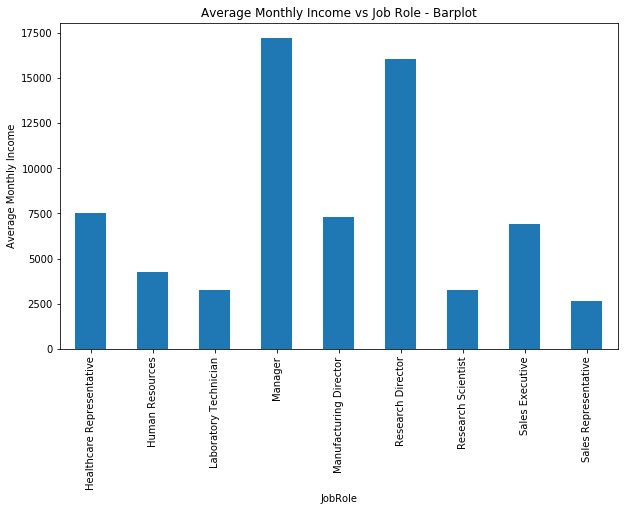

In [191]:
plt.figure(figsize=(10,6))
Job_Role["MonthlyIncome"].plot.bar()
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income vs Job Role - Barplot')

Managers & Research Directors have the highest average monthly incomes in the company

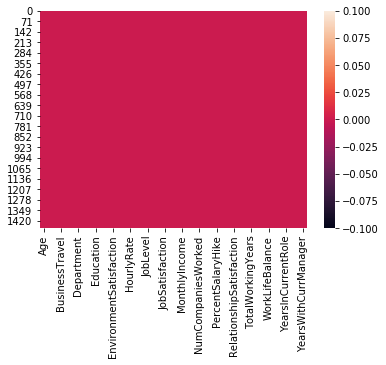

In [192]:
#Checking for null values
sns.heatmap(df.isnull())

Clearly there is no null value in the dataset

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Let's encode categorical features into dummy variables for the machine learning model

In [194]:
cat = pd.get_dummies(df)
cat

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,1,0,0,1,0,1,0


In [195]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

Let's remove some of the dummy variables to reduce dimentions of the dataset

In [196]:
cat.drop(["OverTime_Yes","MaritalStatus_Divorced","JobRole_Manager","Gender_Male","EducationField_Other","Department_Sales","BusinessTravel_Non-Travel","Attrition_No"],axis=1,inplace=True)
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [197]:
cat.shape

(1470, 45)

In [198]:
X=cat.drop("Attrition_Yes", axis=1)
y=cat["Attrition_Yes"]

In [199]:
#Scaling
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.91892141,
         1.45864991, -1.59174553],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  1.08823234,
        -0.68556546,  0.62824112],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.91892141,
         1.45864991, -1.59174553],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ...,  1.08823234,
        -0.68556546, -1.59174553],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  1.08823234,
        -0.68556546,  0.62824112],
       [-0.32016256, -0.43256792, -0.14714972, ...,  1.08823234,
        -0.68556546,  0.62824112]])

Let's do Principal Component Analysis (PCA) for the input features

In [200]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1470, 44)
Reduced shape: (1470, 2)


Finding the best random state

In [108]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.20,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 26 is 0.9285714285714286


In [109]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.20,random_state=26)

In [110]:
print(X_train.shape,"\n",X_test.shape)

(1176, 44) 
 (294, 44)


Observing performance of different classifier algorithms

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [112]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()#(n_neighbors=2)
GNB = GaussianNB()
#MNB = MultinomialNB()
SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(n_estimators=362)
ABC = AdaBoostClassifier(algorithm='SAMME',n_estimators=362)#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()

In [113]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
#models.append(("MultinomialNB", MNB))
models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=26, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.9285714285714286


Cross val score =  0.8414965986394559


roc_auc_score =  0.7612330198537095


Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       261
           1       0.75      0.55      0.63        33

    accuracy                           0.93       294
   macro avg       0.85      0.76      0.80       294
weighted avg       0.92      0.93      0.92       294



Confusion Matrix 
[[255   6]
 [ 15  18]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** KNeighborsClassifier ******************

Cross val score =  0.8653061224489795


roc_auc_score =  0.6835597352838733


Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       261
           1       0.65      0.39      0.49        33

    accuracy                           0.91       294
   macro avg       0.79      0.68      0.72       294
weighted avg       0.90      0.91      0.90       294



Confusion Matrix 
[[254   7]
 [ 20  13]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





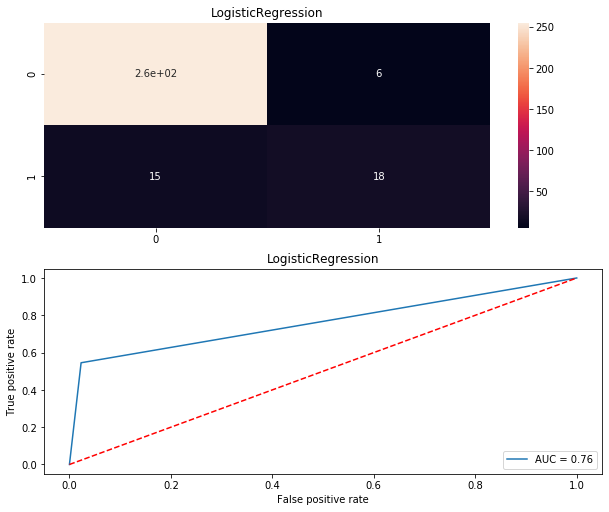

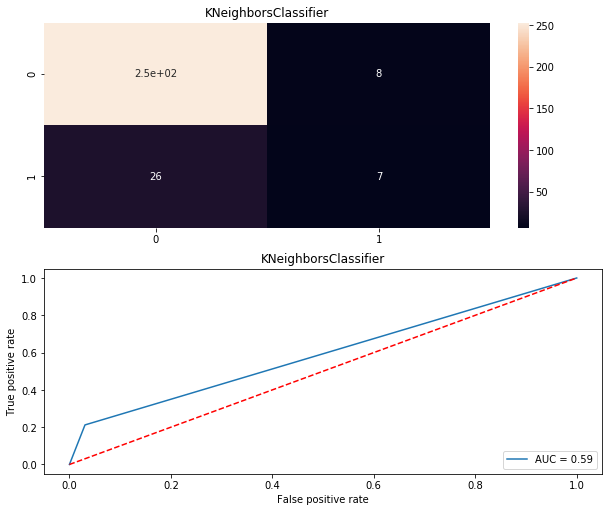

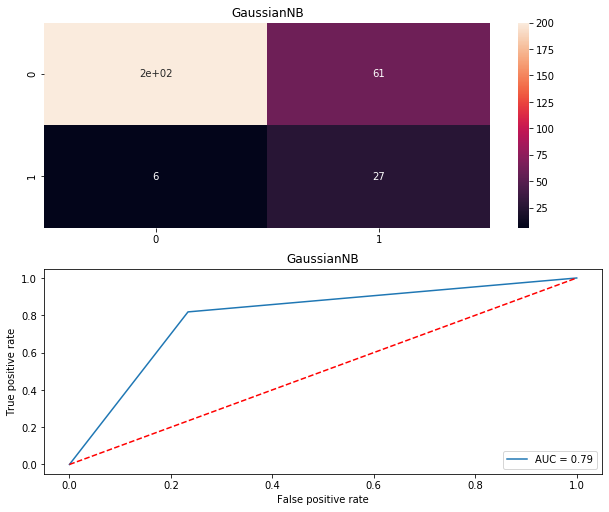

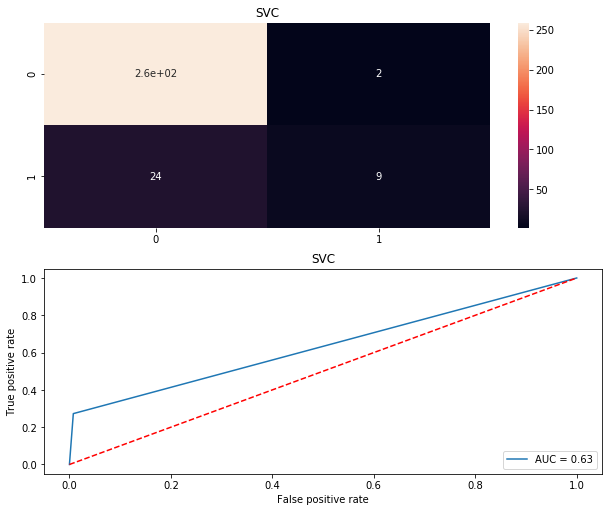

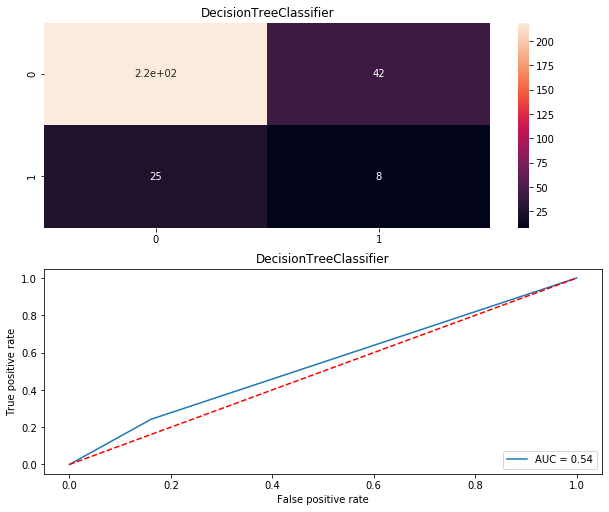

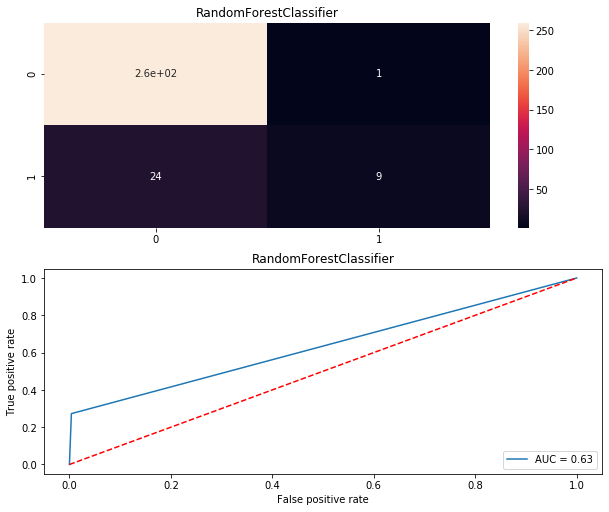

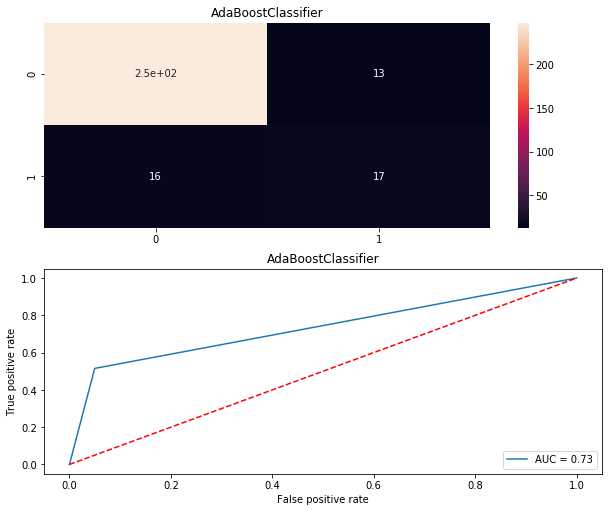

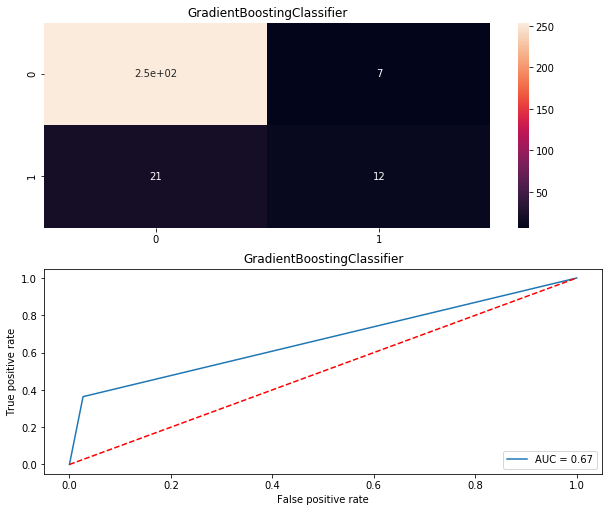

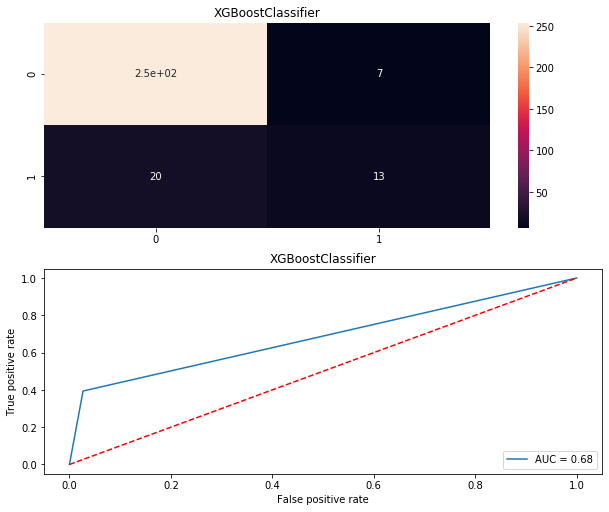

In [115]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [116]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs, 'ROC AUC Curve': rocscore})
result

,Model,Accuracy Socre,Cross val score,ROC AUC Curve
0,LogisticRegression,92.857143,84.149660,76.123302
1,KNeighborsClassifier,88.435374,81.904762,59.073494
2,GaussianNB,77.210884,77.142857,79.223267
3,SVC,91.156463,83.877551,63.253222
4,DecisionTreeClassifier,77.210884,80.204082,54.075235
5,RandomForestClassifier,91.496599,85.850340,63.444793
6,AdaBoostClassifier,90.136054,88.571429,73.267154
7,GradientBoostingClassifier,90.476190,86.530612,66.840822
8,XGBoostClassifier,90.816327,86.530612,68.355974


Clearly AdaBoostClassifier gives the best generalisation performance as confirmed by highest cross validation score

Hyperparameter tuning using GridsearchCV

In [97]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [100,120],
                'learning_rate': [0.01,1,10]
             }
grid = GridSearchCV(estimator=ABC,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=362,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 1, 100],
                         'n_estimators': [100, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8724522178146412
120
{'learning_rate': 1, 'n_estimators': 120}


In [98]:
from sklearn.externals import joblib
joblib.dump(ABC,'HR_Attrition.csv')

['HR_Attrition.csv']